In [37]:
import numpy as np

In [44]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

<function sklearn.metrics.classification.recall_score>

In [2]:

data_raw=load_iris()

data_x=data_raw['data'][:100]
data_y=data_raw['target'][:100]

data_all=pd.DataFrame(data_x)
data_all['target']=data_y

test_data=data_all.sample(frac=0.2)

train_data=data_all.drop(test_data.index)

$${\displaystyle f(x)={\frac {1}{1+e^{-x}}}={\frac {e^{x}}{1+e^{x}}}}$$

$${\displaystyle {\frac {d}{dx}}f(x)={\frac {e^{x}}{(1+e^{x})^{2}}}=f(x)(1-f(x))}
$$

In [3]:
def sigmoid(x,deri=False):
    x=np.array(x,dtype=np.float128)
    if deri==False:
        
        return np.array(1/(1+np.exp(-x)),dtype=np.float128)
    elif deri==True:
        return np.array(sigmoid(x)*(1-sigmoid(x)),dtype=np.float128)
    else:
        print('input error')

In [4]:
X=train_data.iloc[:,0:4]
X=X.T.as_matrix()
Y=train_data.iloc[:,4]
Y=Y.T.as_matrix().reshape(1,-1)

In [5]:
X_mean=X.mean(axis=1).reshape(X.shape[0],1)

In [6]:
X_std=X.std(axis=1).reshape(X.shape[0],1)

In [7]:
X=((X-X_mean)/X_std)

In [8]:
X_test=test_data.iloc[:,0:4]
X_test=X_test.T.as_matrix()
Y_test=test_data.iloc[:,4]
Y_test=Y_test.as_matrix().reshape(1,-1)

# Net shape: data dimention of  each layer =[4,5,2,1]
 
X.shape=(4,80)

$ Z^{[1]}=W^{[1]}X+B^{[1]}   \\
A^{[1]}=sigmoid(Z^{[1]})   \\
Z^{[2]}=W^{[2]}X+B^{[2]}   \\
A^{[2]}=sigmoid(Z^{[2]})  
$

 

## layer 0 =data input

In [9]:
X.shape

(4, 80)

In [10]:
Y.shape

(1, 80)

In [11]:
def cost(AL,Y):
    m=Y.shape[1]
    cost = (-1/m)*np.sum(Y*np.log(AL)+(1-Y)*np.log(1-AL))
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    return   cost



In [12]:

W1=10*0.001*np.random.rand(5,4)
B1=np.zeros(shape=(W1.shape[0],1))
W2=10*0.001*np.random.rand(2,5)
B2=np.zeros(shape=(W2.shape[0],1))
W3=10*0.001*np.random.rand(1,2)
B3=np.zeros(shape=(W3.shape[0],1))






In [13]:
cost_list=[]
iterations=[]
 

In [14]:
iteration_number=1000000
for i in range(iteration_number):

    # forward

    learning_rate=0.0075*10

    Z1=W1.dot(X)+B1   
    A1=sigmoid(Z1)
    A1=np.array(A1,dtype=np.float128)

    Z2=W2.dot(A1)+B2
    A2=sigmoid(Z2)
    A2=np.array(A2,dtype=np.float128)

    Z3=W3.dot(A2)+B3
    A3=sigmoid(Z3)
    A3=np.array(A3,dtype=np.float128)


    dA3 = - (np.divide(Y, A3) - np.divide(1 - Y, 1 - A3))
    dA3=np.array(dA3,dtype=np.float128)

    if i %(iteration_number/100)==0:

        cost_list.append(cost(A3,Y))
        iterations.append(i)
        try:
            print("cost = ",cost_list[-1]," ; cost/cost_previous =  ",(cost_list[-1]/cost_list[-2])
        except:
            print("cost = ",cost_list[-1])

        
        
        
    # backforward




    m=Y.shape[1]
    

    dW3=(1/m)*(dA3*sigmoid(Z3,deri=True)).dot(A2.T )

    dZ3=dA3*sigmoid(Z3,deri=True)

    dB3=(1/m)*np.sum(dZ3,axis=1,keepdims=True)


    dA2=W3.T.dot(dZ3)

    dZ2=dA2*sigmoid(Z2,deri=True)

    dW2=(1/m)*dZ2.dot(A1.T)

    dB2=(1/m)*np.sum(dZ2,axis=1,keepdims=True)

    dA1=W2.T.dot(dZ2)
    dZ1=dA1*sigmoid(Z1,deri=True)

    A0=X

    dW1=(1/m)*dZ1.dot(A0.T)

    dB1=(1/m)*np.sum(dZ1,axis=1,keepdims=True)



    W1+=-learning_rate* dW1
    B1+=-learning_rate* dB1
    W2+=-learning_rate* dW2
    B2+=-learning_rate* dB2
    W3+=-learning_rate* dW3
    B3+=-learning_rate* dB3


0.692745980777
0.0253219306694      0.0175416656967
0.187967410589      0.00329726147843
0.549322425597      0.00181125967316
0.688885687643      0.00124775086544
0.762542978554      0.000951463661429
0.808028266126      0.000768809532627
0.83890113513      0.000644955189619
0.86122557648      0.000555451904984
0.878119005604      0.000487752874465
0.89134771603      0.000434757410642
0.901987165531      0.000392145604518
0.910729585039      0.000357138603678
0.918040687437      0.000327867769231
0.924245301926      0.000303030245365
0.929576895093      0.000281689914605
0.934207577985      0.000263156852866
0.938267016697      0.000246911395262
0.941854755519      0.00023255467182
0.945048482691      0.000219775439746
0.947909716133      0.000208327274702
0.950487802158      0.000198012533461
0.95282278359      0.000188670853318
0.954947493435      0.00018017075846
0.956889107539      0.000172403436268
0.958670312599      0.00016527805614
0.960310196281      0.000158718202533
0.961824

In [15]:
cost_list

[0.69274598077737027278,
 0.017541665696717752161,
 0.0032972614784292959521,
 0.0018112596731593307804,
 0.0012477508654445835871,
 0.00095146366142906867903,
 0.00076880953262651054614,
 0.00064495518961902374068,
 0.00055545190498357697017,
 0.00048775287446524245339,
 0.0004347574106418006076,
 0.00039214560451824875781,
 0.00035713860367795052333,
 0.00032786776923095146124,
 0.00030303024536464571615,
 0.00028168991460547613213,
 0.00026315685286635010422,
 0.00024691139526223088469,
 0.00023255467181950520991,
 0.00021977543974570257525,
 0.00020832727470242246283,
 0.00019801253346138020089,
 0.00018867085331830586062,
 0.00018017075846048183913,
 0.00017240343626786379843,
 0.00016527805614011272205,
 0.00015871820253287480477,
 0.00015265912461769719234,
 0.00014704559247264400281,
 0.00014183020929110481969,
 0.00013697207031931879542,
 0.00013243568817539336136,
 0.0001281901247988571464,
 0.00012420828512071248256,
 0.00012046633836328087042,
 0.00011694324085159948505,
 0

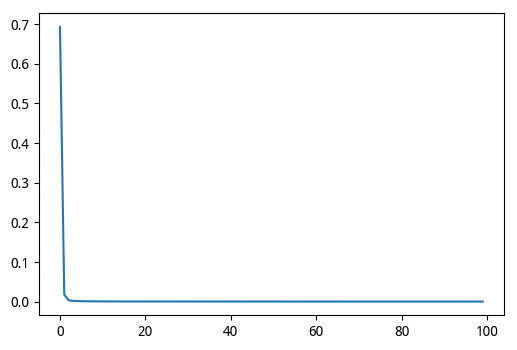

In [16]:
plt.plot(cost_list)

#show plot
plt.show()

In [17]:
Y_test.shape

(1, 20)

In [18]:
cost_list

[0.69274598077737027278,
 0.017541665696717752161,
 0.0032972614784292959521,
 0.0018112596731593307804,
 0.0012477508654445835871,
 0.00095146366142906867903,
 0.00076880953262651054614,
 0.00064495518961902374068,
 0.00055545190498357697017,
 0.00048775287446524245339,
 0.0004347574106418006076,
 0.00039214560451824875781,
 0.00035713860367795052333,
 0.00032786776923095146124,
 0.00030303024536464571615,
 0.00028168991460547613213,
 0.00026315685286635010422,
 0.00024691139526223088469,
 0.00023255467181950520991,
 0.00021977543974570257525,
 0.00020832727470242246283,
 0.00019801253346138020089,
 0.00018867085331830586062,
 0.00018017075846048183913,
 0.00017240343626786379843,
 0.00016527805614011272205,
 0.00015871820253287480477,
 0.00015265912461769719234,
 0.00014704559247264400281,
 0.00014183020929110481969,
 0.00013697207031931879542,
 0.00013243568817539336136,
 0.0001281901247988571464,
 0.00012420828512071248256,
 0.00012046633836328087042,
 0.00011694324085159948505,
 0

In [19]:
X_test_mean=X_test.mean(axis=1).reshape(X_test.shape[0],1)
X_test_std=X_test.std(axis=1).reshape(X_test.shape[0],1)

X_test=(X_test-X_test_mean)/X_test_std

In [20]:
Z1=W1.dot(X_test)+B1   
A1=sigmoid(Z1)

Z2=W2.dot(A1)+B2
A2=sigmoid(Z2)

Z3=W3.dot(A2)+B3
A3=sigmoid(Z3)

cost(A3,Y_test)

6.0980648085124307173e-05

In [35]:
A3[0].round(4)

array([ 0.0001,  0.0001,  1.0,  1.0,  0.0001,  1.0,  0.0001,  0.0001,  1.0,
        1.0,  0.0001,  1.0,  0.0002,  0.0001,  0.0001,  0.0001,  0.0001,
        0.0001,  0.0001,  0.0001], dtype=float128)

In [40]:
Y_test[0]

array([0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

(1, 20)

In [43]:
recall_score(Y_test[0],A3[0].round())

1.0

In [48]:
precision_score(Y_test[0],A3[0].round())

1.0